In [1]:
import socket
import struct
import numpy as np
import time
import matplotlib
from matplotlib import pyplot as plt
import glob, os

In [2]:
computer_path = '/Users/HHG'
data_path = computer_path + '/FilesRepositories'
plot_path = data_path + '/Project/SpatialFreq/'

tdrDir = '/Users/HHG/FilesRepositories/AEDAT/Position/'
dataDir = tdrDir
os.chdir(dataDir)

oneFilenameList = glob.glob("one*")
twoFilenameList = glob.glob("two*")
threeFilenameList = glob.glob("three*")
fourFilenameList = glob.glob("four*")
fiveFilenameList = glob.glob("five*")
sixFilenameList = glob.glob("six*")

onereadlist = []
tworeadlist = []
threereadlist = []
fourreadlist = []
fivereadlist = []
sixreadlist = []

for ind in oneFilenameList:
        onereadlist.append(open(ind, "rb"))

for ind in twoFilenameList:
        tworeadlist.append(open(ind, "rb"))

for ind in threeFilenameList:
        threereadlist.append(open(ind, "rb"))

for ind in fourFilenameList:
        fourreadlist.append(open(ind, "rb"))

for ind in fiveFilenameList:
        fivereadlist.append(open(ind, "rb"))

for ind in sixFilenameList:
        sixreadlist.append(open(ind, "rb"))

        debug = False



In [3]:
#print onereadlist
#print tworeadlist
#print threereadlist
#print fourreadlist
#print fivereadlist
#print sixreadlist

In [4]:
def read_events(file):
    """ A simple function that read dynap-se events from cAER aedat 3.0 file format"""
    
    # raise Exception at end of file
    data = file.read(28)
    if(len(data) <= 0):
        print("read all data\n")
        raise NameError('END OF DATA')


    # read header
    eventtype = struct.unpack('H', data[0:2])[0]
    eventsource = struct.unpack('H', data[2:4])[0]
    eventsize = struct.unpack('I', data[4:8])[0]
    eventoffset = struct.unpack('I', data[8:12])[0]
    eventtsoverflow = struct.unpack('I', data[12:16])[0]
    eventcapacity = struct.unpack('I', data[16:20])[0]
    eventnumber = struct.unpack('I', data[20:24])[0]
    eventvalid = struct.unpack('I', data[24:28])[0]
    next_read = eventcapacity * eventsize  # we now read the full packet
    data = file.read(next_read)    
    counter = 0  # eventnumber[0]
    #spike events
    core_id_tot = []
    chip_id_tot = []
    neuron_id_tot = []
    ts_tot =[]
    #special events
    spec_type_tot =[]
    spec_ts_tot = []

    if(eventtype == 0):
        spec_type_tot =[]
        spec_ts_tot = []
        while(data[counter:counter + eventsize]):  # loop over all event packets
            special_data = struct.unpack('I', data[counter:counter + 4])[0]
            timestamp = struct.unpack('I', data[counter + 4:counter + 8])[0]
            spec_type = (special_data >> 1) & 0x0000007F
            spec_type_tot.append(spec_type)
            spec_ts_tot.append(timestamp)
            if(spec_type == 6 or spec_type == 7 or spec_type == 9 or spec_type == 10):
                print (timestamp, spec_type)
            counter = counter + eventsize        
    elif(eventtype == 12):
        while(data[counter:counter + eventsize]):  # loop over all event packets
            aer_data = struct.unpack('I', data[counter:counter + 4])[0]
            timestamp = struct.unpack('I', data[counter + 4:counter + 8])[0]
            core_id = (aer_data >> 1) & 0x0000001F
            chip_id = (aer_data >> 6) & 0x0000003F
            neuron_id = (aer_data >> 12) & 0x000FFFFF
            core_id_tot.append(core_id)
            chip_id_tot.append(chip_id)
            neuron_id_tot.append(neuron_id)
            ts_tot.append(timestamp)
            counter = counter + eventsize
            if(debug):          
                print("chip id "+str(chip_id)+'\n')
                print("core_id "+str(core_id)+'\n')
                print("neuron_id "+str(neuron_id)+'\n')
                print("timestamp "+str(timestamp)+'\n')
                print("####\n")


    return core_id_tot, chip_id_tot, neuron_id_tot, ts_tot, spec_type_tot, spec_ts_tot

In [5]:
def skip_header(file):
    ''' This function skip the standard header of the recording file '''
    line = file.readline()
    while line.startswith("#"):
        if ( line == '#!END-HEADER\r\n'):
            break
        else:
            line = file.readline()

In [6]:
done_reading_one = [False,False,False,False,False,False,False]
done_reading_two = [False,False,False,False,False,False,False]
done_reading_three = [False,False,False,False,False,False,False]
done_reading_four = [False,False,False,False,False,False,False]
done_reading_five = [False,False,False,False,False,False,False]
done_reading_six = [False,False,False,False,False,False,False]

for datastim in onereadlist:
    skip_header(datastim)
for datastim in tworeadlist:
    skip_header(datastim)
for datastim in threereadlist:
    skip_header(datastim)
for datastim in fourreadlist:
    skip_header(datastim)
for datastim in fivereadlist:
    skip_header(datastim)
for datastim in sixreadlist:
    skip_header(datastim)

for k in range(6):
    neuron_17 = []
    neuron_21 = []
    neuron_26 = []
    neuron_65 = []
    neuron_69 = []
    times = []
    for i in range(len(onereadlist)):
        chip_id_tot = []
        core_id_tot = []
        neuron_id_tot = []
        ts_tot  = []
        spec_type_tot = []
        spec_ts_tot = []
        
        if (k==0):
            done_reading = done_reading_one
            datareadlist = onereadlist
        elif (k==1):
            done_reading = done_reading_two
            datareadlist = tworeadlist
        elif (k==2):
            done_reading = done_reading_three
            datareadlist = threereadlist
        elif (k==3):
            done_reading = done_reading_four
            datareadlist = fourreadlist
        elif (k==4):
            done_reading = done_reading_five
            datareadlist = fivereadlist
        elif (k==5):
            done_reading = done_reading_six
            datareadlist = sixreadlist
            
        while(done_reading[i] == False):
            try:
                core_id, chip_id, neuron_id, ts, spec_type, spec_ts = read_events(datareadlist[i])
                core_id_tot.extend(np.array(core_id))
                chip_id_tot.extend(np.array(chip_id))
                neuron_id_tot.extend(np.array(neuron_id))
                ts_tot.extend(np.array(ts))
                spec_type_tot.extend(np.array(spec_type))
                spec_ts_tot.extend(np.array(spec_ts))
                
            except NameError:
                datareadlist[i].close()
                done_reading[i] = True
        neuron_id_d = []
        for chip, core, neur, ts in zip(chip_id_tot, core_id_tot, neuron_id_tot, ts_tot):
            if chip == 1 and core == 2:
                neuron_id_d.append(neur)
        times.append(ts_tot[-1]-ts_tot[0])
        neuron_17.append(neuron_id_d.count(17))
        neuron_21.append(neuron_id_d.count(21))
        neuron_26.append(neuron_id_d.count(26))
        neuron_65.append(neuron_id_d.count(65))
        neuron_69.append(neuron_id_d.count(69))
        
    if (k==0):
        times_one = times
        neuron_17_one = neuron_17
        neuron_21_one = neuron_21
        neuron_26_one = neuron_26
        neuron_65_one = neuron_65
        neuron_69_one = neuron_69
        
    elif (k==1):
        times_two = times
        neuron_17_two = neuron_17
        neuron_21_two = neuron_21
        neuron_26_two = neuron_26
        neuron_65_two = neuron_65
        neuron_69_two = neuron_69
    elif (k==2):
        times_three = times
        neuron_17_three = neuron_17
        neuron_21_three = neuron_21
        neuron_26_three = neuron_26
        neuron_65_three = neuron_65
        neuron_69_three = neuron_69
    elif (k==3):
        times_four = times
        neuron_17_four = neuron_17
        neuron_21_four = neuron_21
        neuron_26_four = neuron_26
        neuron_65_four = neuron_65
        neuron_69_four = neuron_69
    elif (k==4):
        times_five = times
        neuron_17_five = neuron_17
        neuron_21_five = neuron_21
        neuron_26_five = neuron_26
        neuron_65_five = neuron_65
        neuron_69_five = neuron_69
    elif (k==5):
        times_six = times
        neuron_17_six = neuron_17
        neuron_21_six = neuron_21
        neuron_26_six = neuron_26
        neuron_65_six = neuron_65
        neuron_69_six = neuron_69

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data

read all data



In [7]:
print "neuron 17"
print neuron_17_one
print neuron_17_two
print neuron_17_three
print neuron_17_four
print neuron_17_five
print neuron_17_six
print "neuron 21"
print neuron_21_one
print neuron_21_two
print neuron_21_three
print neuron_21_four
print neuron_21_five
print neuron_21_six
print "neuron 26"
print neuron_26_one
print neuron_26_two
print neuron_26_three
print neuron_26_four
print neuron_26_five
print neuron_26_six
print "neuron 65"
print neuron_65_one
print neuron_65_two
print neuron_65_three
print neuron_65_four
print neuron_65_five
print neuron_65_six
print "neuron 69"
print neuron_69_one
print neuron_69_two
print neuron_69_three
print neuron_69_four
print neuron_69_five
print neuron_69_six

neuron 17
[57, 81, 58, 0, 0, 0, 0]
[243, 257, 0, 0, 0, 0, 0]
[355, 34, 0, 0, 0, 0, 0]
[169, 0, 0, 0, 0, 0, 0]
[27, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
neuron 21
[0, 0, 0, 58, 0, 0, 0]
[0, 2, 188, 0, 0, 0, 0]
[0, 189, 3, 0, 0, 0, 0]
[196, 3, 9, 0, 0, 0, 0]
[2, 2, 9, 0, 0, 0, 0]
[6, 4, 10, 0, 0, 0, 0]
neuron 26
[0, 0, 0, 91, 0, 0, 0]
[0, 2, 190, 97, 0, 0, 0]
[0, 195, 217, 94, 0, 0, 0]
[2, 189, 196, 86, 0, 0, 0]
[8, 191, 190, 86, 0, 0, 0]
[195, 192, 190, 84, 0, 0, 0]
neuron 65
[59, 0, 0, 0, 78, 8, 0]
[222, 1, 0, 0, 232, 1, 0]
[228, 0, 0, 33, 3, 1, 0]
[16, 0, 0, 26, 3, 3, 0]
[106, 58, 38, 10, 8, 1, 0]
[25, 53, 45, 12, 1, 0, 0]
neuron 69
[0, 106, 0, 0, 0, 0, 0]
[0, 250, 2, 0, 0, 0, 0]
[21, 206, 0, 0, 0, 0, 0]
[3, 1, 5, 0, 0, 0, 0]
[20, 195, 1, 0, 0, 0, 0]
[205, 200, 0, 0, 0, 0, 0]


In [8]:
times_sec_one = [i * (10**-6) for i in times_one]
times_sec_two = [i * (10**-6) for i in times_two]
times_sec_three = [i * (10**-6) for i in times_three]
times_sec_four = [i * (10**-6) for i in times_four]
times_sec_five = [i * (10**-6) for i in times_five]
times_sec_six = [i * (10**-6) for i in times_six]

for j in range(6):
    activity_17 = []
    activity_21 = []
    activity_26 = []
    activity_65 = []
    activity_69 = []
    for k in range(5):
        if (j==0):
            times_sec = times_sec_one
            if (k == 0):
                neuron_17 = neuron_17_one
            elif (k == 1):
                neuron_21 = neuron_21_one
            elif (k == 2):
                neuron_26 = neuron_26_one
            elif (k == 3):
                neuron_65 = neuron_65_one
            elif (k == 4):
                neuron_69 = neuron_69_one
        elif (j==1):
            times_sec = times_sec_two
            if (k == 0):
                neuron_17 = neuron_17_two
            elif (k == 1):
                neuron_21 = neuron_21_two
            elif (k == 2):
                neuron_26 = neuron_26_two
            elif (k == 3):
                neuron_65 = neuron_65_two
            elif (k == 4):
                neuron_69 = neuron_69_two
        elif (j==2):
            times_sec = times_sec_three
            if (k == 0):
                neuron_17 = neuron_17_three
            elif (k == 1):
                neuron_21 = neuron_21_three
            elif (k == 2):
                neuron_26 = neuron_26_three
            elif (k == 3):
                neuron_65 = neuron_65_three
            elif (k == 4):
                neuron_69 = neuron_69_three
        elif (j==3):
            times_sec = times_sec_four
            if (k == 0):
                neuron_17 = neuron_17_four
            elif (k == 1):
                neuron_21 = neuron_21_four
            elif (k == 2):
                neuron_26 = neuron_26_four
            elif (k == 3):
                neuron_65 = neuron_65_four
            elif (k == 4):
                neuron_69 = neuron_69_four
        elif (j==4):
            times_sec = times_sec_five
            if (k == 0):
                neuron_17 = neuron_17_five
            elif (k == 1):
                neuron_21 = neuron_21_five
            elif (k == 2):
                neuron_26 = neuron_26_five
            elif (k == 3):
                neuron_65 = neuron_65_five
            elif (k == 4):
                neuron_69 = neuron_69_five
        elif (j==5):
            times_sec = times_sec_six
            if (k == 0):
                neuron_17 = neuron_17_six
            elif (k == 1):
                neuron_21 = neuron_21_six
            elif (k == 2):
                neuron_26 = neuron_26_six
            elif (k == 3):
                neuron_65 = neuron_65_six
            elif (k == 4):
                neuron_69 = neuron_69_six
                
    for i,count in enumerate(neuron_17):
        activity_17.append(count/times_sec[i])
    for i,count in enumerate(neuron_21):
        activity_21.append(count/times_sec[i])
    for i,count in enumerate(neuron_26):
        activity_26.append(count/times_sec[i])
    for i,count in enumerate(neuron_65):
        activity_65.append(count/times_sec[i])
    for i,count in enumerate(neuron_69):
        activity_69.append(count/times_sec[i])  

    if (j==0):
        activity_17_one = activity_17
        activity_21_one = activity_21
        activity_26_one = activity_26
        activity_65_one = activity_65
        activity_69_one = activity_69
    elif (j==1):
        activity_17_two = activity_17
        activity_21_two = activity_21
        activity_26_two = activity_26
        activity_65_two = activity_65
        activity_69_two = activity_69
    elif (j==2):
        activity_17_three = activity_17
        activity_21_three = activity_21
        activity_26_three = activity_26
        activity_65_three = activity_65
        activity_69_three = activity_69
    elif (j==3):
        activity_17_four = activity_17
        activity_21_four = activity_21
        activity_26_four = activity_26
        activity_65_four = activity_65
        activity_69_four = activity_69
    elif (j==4):
        activity_17_five = activity_17
        activity_21_five = activity_21
        activity_26_five = activity_26
        activity_65_five = activity_65
        activity_69_five = activity_69
    elif (j==5):
        activity_17_six = activity_17
        activity_21_six = activity_21
        activity_26_six = activity_26
        activity_65_six = activity_65
        activity_69_six = activity_69

In [9]:
activity_17_one.insert(0,activity_17_one[6])
activity_17_two.insert(0,activity_17_two[6])
activity_17_three.insert(0,activity_17_three[6])
activity_17_four.insert(0,activity_17_four[6])
activity_17_five.insert(0,activity_17_five[6])
activity_17_six.insert(0,activity_17_six[6])

activity_21_one.insert(0,activity_21_one[6])
activity_21_two.insert(0,activity_21_two[6])
activity_21_three.insert(0,activity_21_three[6])
activity_21_four.insert(0,activity_21_four[6])
activity_21_five.insert(0,activity_21_five[6])
activity_21_six.insert(0,activity_21_six[6])

activity_26_one.insert(0,activity_26_one[6])
activity_26_two.insert(0,activity_26_two[6])
activity_26_three.insert(0,activity_26_three[6])
activity_26_four.insert(0,activity_26_four[6])
activity_26_five.insert(0,activity_26_five[6])
activity_26_six.insert(0,activity_26_six[6])

activity_65_one.insert(0,activity_65_one[6])
activity_65_two.insert(0,activity_65_two[6])
activity_65_three.insert(0,activity_65_three[6])
activity_65_four.insert(0,activity_65_four[6])
activity_65_five.insert(0,activity_65_five[6])
activity_65_six.insert(0,activity_65_six[6])

activity_69_one.insert(0,activity_69_one[6])
activity_69_two.insert(0,activity_69_two[6])
activity_69_three.insert(0,activity_69_three[6])
activity_69_four.insert(0,activity_69_four[6])
activity_69_five.insert(0,activity_69_five[6])
activity_69_six.insert(0,activity_69_six[6])

In [10]:
avgact_17 =[]
avgact_21 =[]
avgact_26 =[]
avgact_65 =[]
avgact_69 =[]

avgact_17.append(max(activity_17_one))
avgact_17.append(max(activity_17_two))
avgact_17.append(max(activity_17_three))
avgact_17.append(max(activity_17_four))
avgact_17.append(max(activity_17_five))
avgact_17.append(max(activity_17_six))

avgact_21.append(max(activity_21_one))
avgact_21.append(max(activity_21_two))
avgact_21.append(max(activity_21_three))
avgact_21.append(max(activity_21_four))
avgact_21.append(max(activity_21_five))
avgact_21.append(max(activity_21_six))

avgact_26.append(max(activity_26_one))
avgact_26.append(max(activity_26_two))
avgact_26.append(max(activity_26_three))
avgact_26.append(max(activity_26_four))
avgact_26.append(max(activity_26_five))
avgact_26.append(max(activity_26_six))

avgact_65.append(max(activity_65_one))
avgact_65.append(max(activity_65_two))
avgact_65.append(max(activity_65_three))
avgact_65.append(max(activity_65_four))
avgact_65.append(max(activity_65_five))
avgact_65.append(max(activity_65_six))

avgact_69.append(max(activity_69_one))
avgact_69.append(max(activity_69_two))
avgact_69.append(max(activity_69_three))
avgact_69.append(max(activity_69_four))
avgact_69.append(max(activity_69_five))
avgact_69.append(max(activity_69_six))

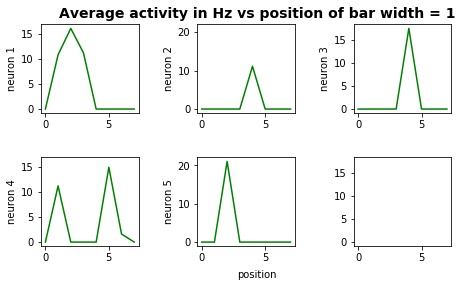

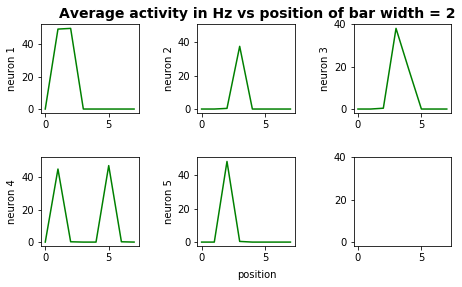

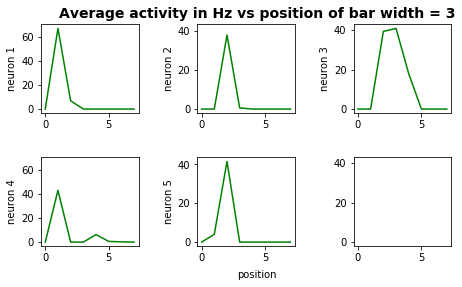

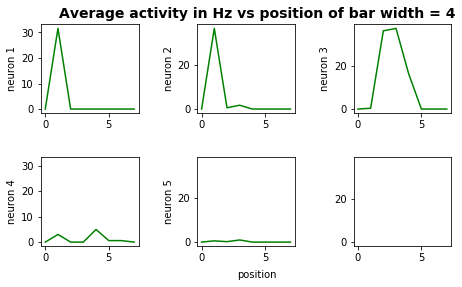

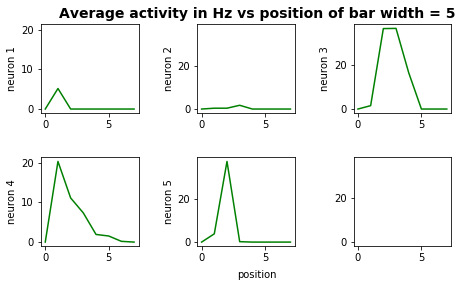

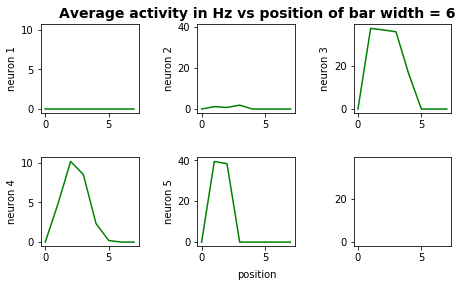

In [11]:
spatial = [1,2,3,4,5,6]
position = [0,1,2,3,4,5,6,7]
plt.clf()
f1, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='row', sharey='col')
ax1.plot(position, activity_17_one, 'g-')
ax2.plot(position, activity_21_one, 'g-')
ax3.plot(position, activity_26_one, 'g-')
ax4.plot(position, activity_65_one, 'g-')
ax5.plot(position, activity_69_one, 'g-') 
ax1.set_ylabel('neuron 1')#17  
ax2.set_ylabel('neuron 2')#21
ax3.set_ylabel('neuron 3')#26 
ax4.set_ylabel('neuron 4')#65   
ax5.set_ylabel('neuron 5')#69
plt.subplots_adjust(top=0.92, bottom=0.15, left=0, right=0.95, hspace=0.5,
                    wspace=0.6)
f1.suptitle('Average activity in Hz vs position of bar width = 1', fontsize=14, fontweight='bold')
f1.text(0.5, 0.04, 'position', ha='center')
f1.savefig(plot_path + 'ActivityvsPosition_w1', format='png', dpi=200)


f2, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='row', sharey='col')
ax1.plot(position, activity_17_two, 'g-')
ax2.plot(position, activity_21_two, 'g-')
ax3.plot(position, activity_26_two, 'g-')
ax4.plot(position, activity_65_two, 'g-')
ax5.plot(position, activity_69_two, 'g-') 
ax1.set_ylabel('neuron 1')#17  
ax2.set_ylabel('neuron 2')#21
ax3.set_ylabel('neuron 3')#26 
ax4.set_ylabel('neuron 4')#65   
ax5.set_ylabel('neuron 5')#69
plt.subplots_adjust(top=0.92, bottom=0.15, left=0, right=0.95, hspace=0.5,
                    wspace=0.6)
f2.suptitle('Average activity in Hz vs position of bar width = 2', fontsize=14, fontweight='bold')
f2.text(0.5, 0.04, 'position', ha='center')
f2.savefig(plot_path + 'ActivityvsPosition_w2', format='png', dpi=200)

f3, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='row', sharey='col')
ax1.plot(position, activity_17_three, 'g-')
ax2.plot(position, activity_21_three, 'g-')
ax3.plot(position, activity_26_three, 'g-')
ax4.plot(position, activity_65_three, 'g-')
ax5.plot(position, activity_69_three, 'g-')
ax1.set_ylabel('neuron 1')#17  
ax2.set_ylabel('neuron 2')#21
ax3.set_ylabel('neuron 3')#26 
ax4.set_ylabel('neuron 4')#65   
ax5.set_ylabel('neuron 5')#69
plt.subplots_adjust(top=0.92, bottom=0.15, left=0, right=0.95, hspace=0.5,
                    wspace=0.6)
f3.suptitle('Average activity in Hz vs position of bar width = 3', fontsize=14, fontweight='bold')
f3.text(0.5, 0.04, 'position', ha='center')
f3.savefig(plot_path + 'ActivityvsPosition_w3', format='png', dpi=200)

f4, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='row', sharey='col')
ax1.plot(position, activity_17_four, 'g-')
ax2.plot(position, activity_21_four, 'g-')
ax3.plot(position, activity_26_four, 'g-')
ax4.plot(position, activity_65_four, 'g-')
ax5.plot(position, activity_69_four, 'g-')
ax1.set_ylabel('neuron 1')#17  
ax2.set_ylabel('neuron 2')#21
ax3.set_ylabel('neuron 3')#26 
ax4.set_ylabel('neuron 4')#65   
ax5.set_ylabel('neuron 5')#69
plt.subplots_adjust(top=0.92, bottom=0.15, left=0, right=0.95, hspace=0.5,
                    wspace=0.6)
f4.suptitle('Average activity in Hz vs position of bar width = 4', fontsize=14, fontweight='bold')
f4.text(0.5, 0.04, 'position', ha='center')
f4.savefig(plot_path + 'ActivityvsPosition_w4', format='png', dpi=200)


f5, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='row', sharey='col')
ax1.plot(position, activity_17_five, 'g-')
ax2.plot(position, activity_21_five, 'g-')
ax3.plot(position, activity_26_five, 'g-')
ax4.plot(position, activity_65_five, 'g-')
ax5.plot(position, activity_69_five, 'g-') 
ax1.set_ylabel('neuron 1')#17  
ax2.set_ylabel('neuron 2')#21
ax3.set_ylabel('neuron 3')#26 
ax4.set_ylabel('neuron 4')#65   
ax5.set_ylabel('neuron 5')#69
plt.subplots_adjust(top=0.92, bottom=0.15, left=0, right=0.95, hspace=0.5,
                    wspace=0.6)
f5.suptitle('Average activity in Hz vs position of bar width = 5', fontsize=14, fontweight='bold')
f5.text(0.5, 0.04, 'position', ha='center')
f5.savefig(plot_path + 'ActivityvsPosition_w5', format='png', dpi=200)



f6, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='row', sharey='col')
ax1.plot(position, activity_17_six, 'g-')
ax2.plot(position, activity_21_six, 'g-')
ax3.plot(position, activity_26_six, 'g-')
ax4.plot(position, activity_65_six, 'g-')
ax5.plot(position, activity_69_six, 'g-') 
ax1.set_ylabel('neuron 1')#17  
ax2.set_ylabel('neuron 2')#21
ax3.set_ylabel('neuron 3')#26 
ax4.set_ylabel('neuron 4')#65   
ax5.set_ylabel('neuron 5')#69
plt.subplots_adjust(top=0.92, bottom=0.15, left=0, right=0.95, hspace=0.5,
                    wspace=0.6)
f6.suptitle('Average activity in Hz vs position of bar width = 6', fontsize=14, fontweight='bold')
f6.text(0.5, 0.04, 'position', ha='center')
f6.savefig(plot_path + 'ActivityvsPosition_w6', format='png', dpi=200)

#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
#fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
plt.show()

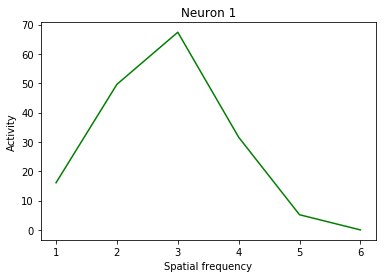

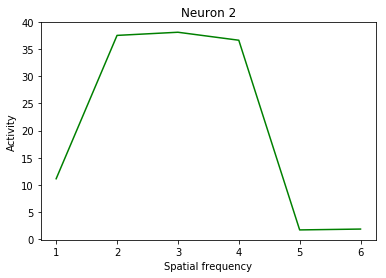

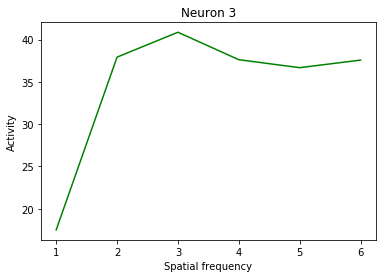

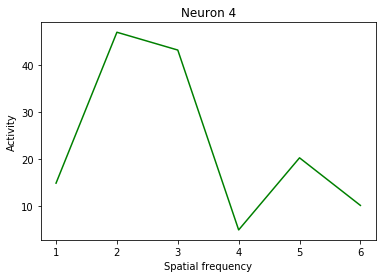

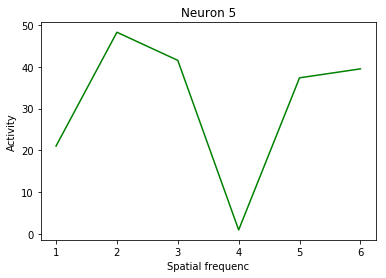

In [12]:
fig7 = plt.figure()
plt.plot(spatial, avgact_17, 'g-')
plt.xlabel('Spatial frequency')#(number of lines)    
plt.ylabel('Activity')
plt.title('Neuron 1')#17
fig7.savefig(plot_path + 'Activity17vsSpatial', format='png', dpi=200)

fig8 = plt.figure()
plt.plot(spatial, avgact_21, 'g-')
plt.xlabel('Spatial frequency')    
plt.ylabel('Activity')
plt.title('Neuron 2')#21
fig8.savefig(plot_path + 'Activity21vsSpatial', format='png', dpi=200)

fig9 = plt.figure()
plt.plot(spatial, avgact_26, 'g-')
plt.xlabel('Spatial frequency')    
plt.ylabel('Activity')
plt.title('Neuron 3')#26
fig9.savefig(plot_path + 'Activity26vsSpatial', format='png', dpi=200)

fig10 = plt.figure()
plt.plot(spatial, avgact_65, 'g-')
plt.xlabel('Spatial frequency')    
plt.ylabel('Activity')
plt.title('Neuron 4')#65
fig10.savefig(plot_path + 'Activity65vsSpatial', format='png', dpi=200)

fig11= plt.figure()
plt.plot(spatial, avgact_69, 'g-')
plt.xlabel('Spatial frequenc')    
plt.ylabel('Activity')
plt.title('Neuron 5')#69
fig11.savefig(plot_path + 'Activity69vsSpatial', format='png', dpi=200)

plt.show()